# Worksheet 18

Name: Stone Harris
UID: U41533031

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

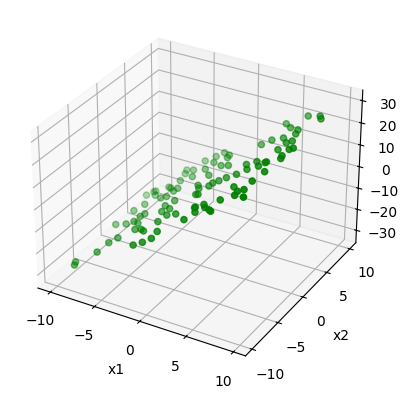

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

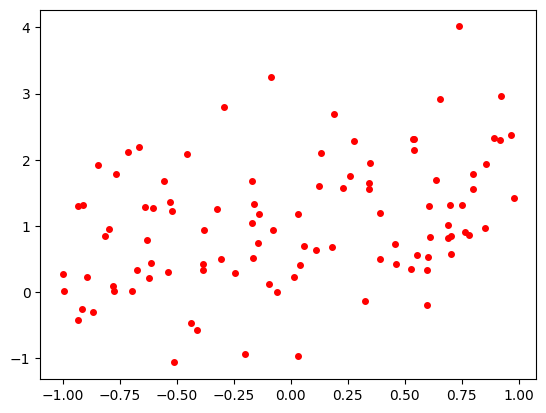

In [13]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
beta_0 = 1  
beta_1 = 0.5  

true_beta = np.array([beta_0, beta_1])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

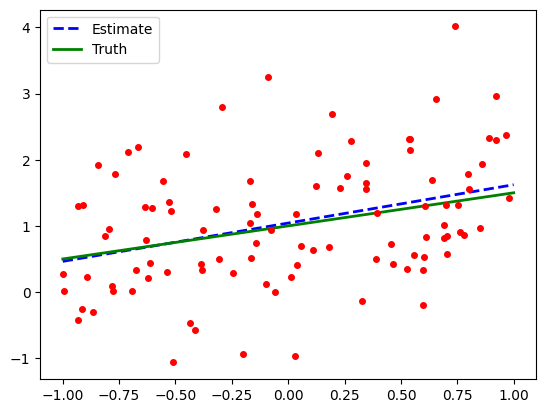

In [19]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta is close to the true parameters used to generate the data. The estimate is not exactly the same because the random noise added to the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

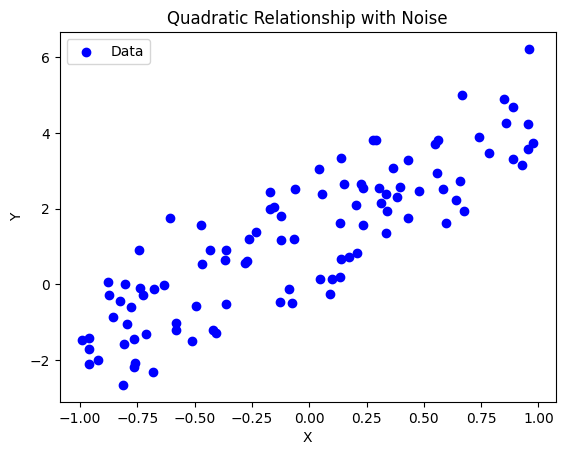

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

intercept = 1
linear_coef = 3
quadratic_coef = 0.5

x = -1.0 + 2.0 * np.random.rand(100)  

eps = np.random.randn(100)  
y = intercept + linear_coef * x + quadratic_coef * x**2 + eps

plt.scatter(x, y, color='blue', label='Data')
plt.title('Quadratic Relationship with Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

e) Plot the least squares estimate line through the scatter plot.

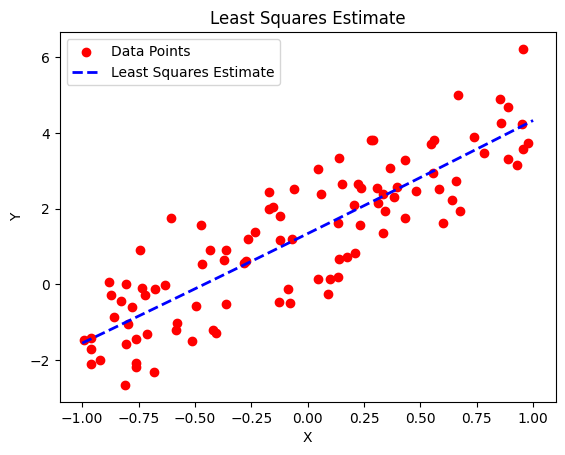

In [24]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
np.random.seed(0) 

x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
eps = np.random.randn(SAMPLE_SIZE) 
y = 1 + 3*x + 0.5*x**2 + eps

X = np.vstack((np.ones(SAMPLE_SIZE), x, x**2)).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1, 1, 100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2

plt.scatter(x, y, color='red', marker='o', label='Data Points')
plt.plot(x_plot, y_est, 'b--', lw=2, label='Least Squares Estimate')

plt.title('Least Squares Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate of beta is again a close approximation to the true parameters used to generate the data. This is because least squares estimation minimizes the sum of the squares of the differences between the observed and predicted values, so it converges towards the true parameters that were used originally.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

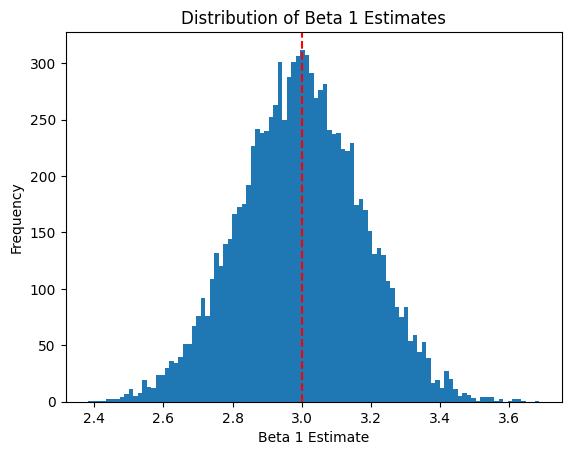

In [28]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100
np.random.seed(0)

betas = []
true_beta = np.array([1, 3, 0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + eps
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)


betas = np.array(betas)
plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.title('Distribution of Beta 1 Estimates')
plt.xlabel('Beta 1 Estimate')
plt.ylabel('Frequency')
plt.show()